In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df=pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.shape

(200000, 9)

In [7]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


<Axes: xlabel='fare_amount', ylabel='Count'>

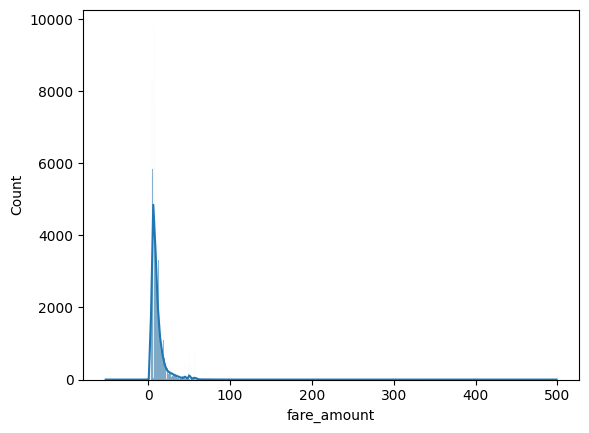

In [11]:
sns.histplot(data=df,x='fare_amount',kde=True)

In [12]:
df.sample(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
159023,30042760,2013-09-14 06:56:00.0000009,6.0,2013-09-14 06:56:00 UTC,-73.990583,40.755952,-73.980465,40.750437,5
59898,9125600,2015-01-08 08:26:34.0000002,3.5,2015-01-08 08:26:34 UTC,-73.991783,40.744316,-73.991615,40.749050,1
123708,24724488,2010-01-18 13:57:24.0000001,24.9,2010-01-18 13:57:24 UTC,-73.990552,40.739440,-73.950023,40.784365,2


<Axes: xlabel='fare_amount'>

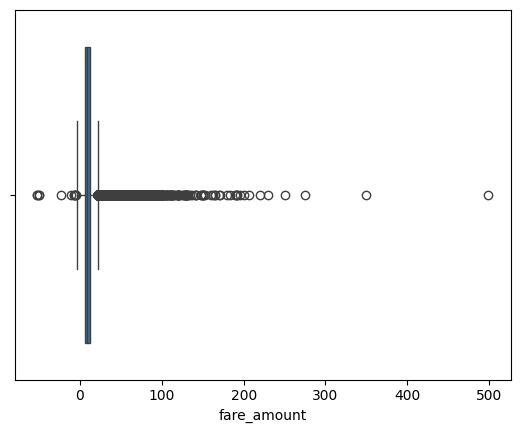

In [13]:
sns.boxplot(data=df,x='fare_amount')

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

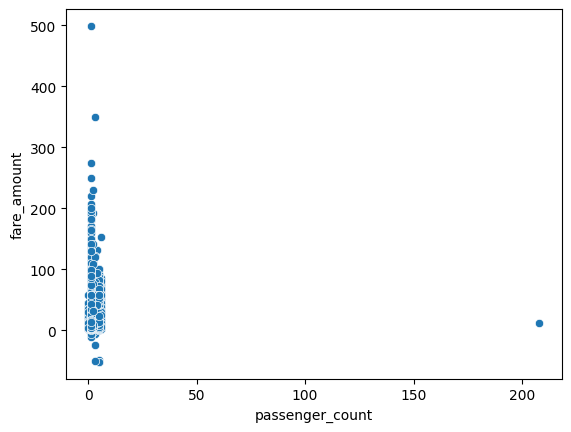

In [14]:
sns.scatterplot(data=df,x='passenger_count',y='fare_amount')

In [15]:
#insights from EDA

#target variable is right skewed due to the presence of many outliers
#average fare is 11.36
#minimum fare is -52 and maximum fare is 499. Appears to be affected by outliers
#there is no relation between the fare amount and the number of passengers except for 1 outlier

In [16]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [19]:
#dropped missing values as only 1 missing value each in 2 columns containing 200,000 records is insignificant

In [20]:
df.sample(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
41163,20173320,2010-05-24 19:11:00.00000034,8.1,2010-05-24 19:11:00 UTC,-73.974348,40.759982,-73.958915,40.774918,5
101097,24030793,2013-05-09 09:10:59.0000003,10.0,2013-05-09 09:10:59 UTC,-73.970666,40.751020,-73.971402,40.757270,1
182473,19670506,2009-09-07 17:23:00.000000142,4.1,2009-09-07 17:23:00 UTC,-73.947627,40.783642,-73.954822,40.779233,1
157250,41181637,2014-01-19 16:02:00.00000074,6.0,2014-01-19 16:02:00 UTC,-73.984187,40.729147,-73.978582,40.720937,1
66569,29877672,2013-04-09 15:17:00.00000071,10.5,2013-04-09 15:17:00 UTC,-73.970392,40.768010,-73.987140,40.755637,1


In [21]:
#converting column to datetime format for easy data manipulation

In [22]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [23]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [24]:
df.dtypes

Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [25]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [26]:
df.shape

(199999, 9)

In [27]:
df['pickup_year']=df['pickup_datetime'].dt.year

In [28]:
df['pickup_month']=df['pickup_datetime'].dt.month

In [29]:
df['pickup_day']=df['pickup_datetime'].dt.day

In [30]:
#extracted year, month and day into separate columns

In [31]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28


In [32]:
df.sample(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day
55278,44687337,2012-09-14 20:27:00.00000027,36.3,2012-09-14 20:27:00+00:00,-73.977897,40.745677,-73.814283,40.708987,5,2012,9,14
158465,29189593,2010-10-30 22:06:00.000000162,8.1,2010-10-30 22:06:00+00:00,0.000000,0.000000,0.000000,0.000000,4,2010,10,30
25316,51512239,2011-10-06 14:25:18.0000004,7.3,2011-10-06 14:25:18+00:00,-73.979678,40.749689,-73.963464,40.755899,5,2011,10,6


In [33]:
df.drop(['Unnamed: 0','key'],axis=1,inplace=True)

In [34]:
#dropped columns which are not important 

In [35]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28


In [36]:
df['pickup_hour']=df['pickup_datetime'].dt.hour

In [37]:
df['pickup_minute']=df['pickup_datetime'].dt.minute

In [38]:
df['pickup_second']=df['pickup_datetime'].dt.second

In [39]:
#extracted hour, minute and second into separate columns

In [40]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52,6
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4,56
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22,21
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47,0


In [41]:
df['time_of_day']=np.where(df['pickup_datetime'].dt.hour<11,'morning',df['pickup_datetime'])

In [42]:
df['time_of_day']=np.where(df['pickup_datetime'].dt.hour>19,'night',df['time_of_day'])

In [43]:
df['time_of_day']=np.where((df['pickup_datetime'].dt.hour>=11)&(df['pickup_datetime'].dt.hour<=15),'afternoon',df['time_of_day'])

In [44]:
df['time_of_day']=np.where((df['pickup_datetime'].dt.hour>15)&(df['pickup_datetime'].dt.hour<=19),'evening',df['time_of_day'])

In [45]:
#created a new column for time of day i.e. morning, afternoon, evening and night

In [46]:
df.sample(6)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,time_of_day
165223,6.9,2010-07-09 14:43:38+00:00,-73.991664,40.742526,-73.979139,40.747488,1,2010,7,9,14,43,38,afternoon
173738,14.5,2014-01-04 13:28:00+00:00,-73.973917,40.791492,-73.937788,40.804460,1,2014,1,4,13,28,0,afternoon
28628,14.5,2011-05-11 11:00:00+00:00,0.000000,0.000000,0.000000,0.000000,5,2011,5,11,11,0,0,afternoon
171095,7.3,2012-09-02 23:23:41+00:00,-73.987101,40.757707,-73.975506,40.765321,1,2012,9,2,23,23,41,night
199034,6.5,2010-02-23 18:24:00+00:00,-73.950483,40.785370,-73.960275,40.775655,2,2010,2,23,18,24,0,evening
85739,44.0,2013-06-01 06:15:00+00:00,-73.781810,40.644697,-73.956725,40.747872,3,2013,6,1,6,15,0,morning


In [47]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [48]:
#dropped pickup_datetime column as it is explained in new columns

In [49]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,time_of_day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52,6,evening
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4,56,night
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45,0,night
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22,21,morning
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47,0,evening


In [50]:
df.drop(['pickup_hour','pickup_minute','pickup_second'],axis=1,inplace=True)

In [51]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,time_of_day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,evening
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,night
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,night
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,morning
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,evening


In [52]:
#dropped hour, minute and second columns as it is explained by time of day column

In [53]:
X=df.drop('fare_amount', axis=1)
y=df['fare_amount']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

In [55]:
#splitted data into train and test sets

In [56]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler=StandardScaler()
encoder=LabelEncoder()

In [57]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,time_of_day
79518,-73.991780,40.764622,-73.987505,40.768732,1,2012,11,4,morning
180438,-74.008301,40.722672,-74.009338,40.715561,1,2015,2,11,evening
152409,-73.972582,40.758526,-73.958155,40.781626,2,2011,11,21,afternoon
23823,-73.993590,40.721192,-73.985810,40.740520,1,2013,4,18,morning
194414,-73.958742,40.764012,-73.986810,40.739623,1,2010,1,6,evening
...,...,...,...,...,...,...,...,...,...
61872,-74.001365,40.730995,-73.910469,40.772606,1,2014,3,18,night
128964,-74.010112,40.704332,-73.979005,40.761930,1,2013,7,19,night
36482,-73.977308,40.749272,-73.985047,40.714530,5,2009,8,16,night
40177,-73.790133,40.642545,-74.007585,40.740952,5,2012,10,17,afternoon


In [58]:
X_train['time_of_day']=encoder.fit_transform(X_train['time_of_day'])
X_test['time_of_day']=encoder.transform(X_test['time_of_day'])

In [59]:
#encoded categorical variable

In [60]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,time_of_day
79518,-73.991780,40.764622,-73.987505,40.768732,1,2012,11,4,2
180438,-74.008301,40.722672,-74.009338,40.715561,1,2015,2,11,1
152409,-73.972582,40.758526,-73.958155,40.781626,2,2011,11,21,0
23823,-73.993590,40.721192,-73.985810,40.740520,1,2013,4,18,2
194414,-73.958742,40.764012,-73.986810,40.739623,1,2010,1,6,1
...,...,...,...,...,...,...,...,...,...
61872,-74.001365,40.730995,-73.910469,40.772606,1,2014,3,18,3
128964,-74.010112,40.704332,-73.979005,40.761930,1,2013,7,19,3
36482,-73.977308,40.749272,-73.985047,40.714530,5,2009,8,16,3
40177,-73.790133,40.642545,-74.007585,40.740952,5,2012,10,17,0


In [61]:
X_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,time_of_day
193700,-73.987737,40.719527,-73.916090,40.766612,1,2014,2,7,2
68358,-73.994131,40.751694,-74.002584,40.756033,1,2014,3,23,2
142453,-73.973178,40.792825,-73.983355,40.771240,1,2010,2,22,0
86921,-73.991444,40.752168,-73.995940,40.759278,2,2010,6,9,3
133907,-73.981168,40.756702,-73.958350,40.763573,1,2010,1,28,2
...,...,...,...,...,...,...,...,...,...
160009,-73.987651,40.760214,-73.959709,40.763583,1,2013,4,9,3
26563,-73.985847,40.743820,-73.963887,40.767803,1,2009,10,5,0
31198,-73.945958,40.773417,-73.984373,40.752550,1,2014,9,8,1
151659,-73.959385,40.771702,-73.954892,40.777065,1,2013,9,5,1


In [62]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [63]:
#feature scaling done

<Axes: >

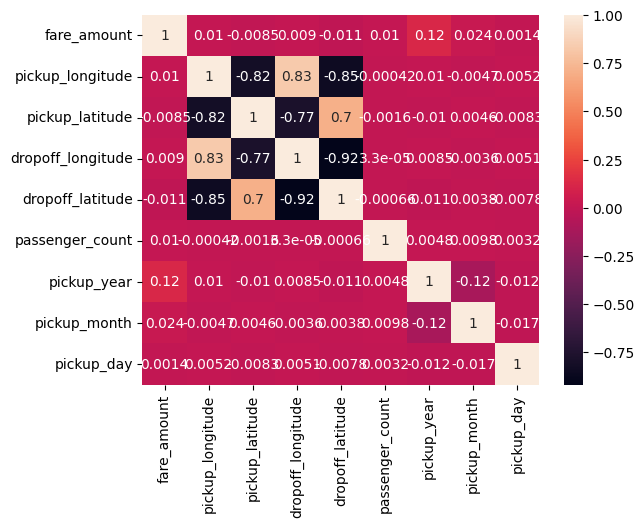

In [64]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [65]:
#insights from correlation analysis

#dropoff_longitude is the strongest positively correlated feature with the target fare_amount at 50
#all other features have little to no influence on the target variable

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [67]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1)

In [68]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [69]:
#trained random forest regressor model

In [70]:
y_pred=model.predict(X_test)

In [71]:
mean_absolute_error(y_test,y_pred)

2.0374125773386242

In [72]:
mean_squared_error(y_test,y_pred)

24.072911403019095

In [73]:
r2_score(y_test,y_pred)

0.748198859640862

In [74]:
#evaluated the model

In [76]:
#params={
#    'criterion':['squared_error','absolute_error','friedman_mse','poisson']
#}

In [77]:
#from sklearn.model_selection import RandomizedSearchCV

In [78]:
#ran=RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1),param_distributions=params,verbose=4)

In [79]:
#ran.fit(X_train,y_train)

In [80]:
#random search hyperparameter tuning paused due to computational power limit

In [82]:
y_train_pred=model.predict(X_train)

In [83]:
mean_absolute_error(y_train,y_train_pred)

0.7693641724135896

In [84]:
mean_squared_error(y_train,y_train_pred)

3.3880038561098487

In [85]:
r2_score(y_train,y_train_pred)

0.965808282092039

In [86]:
#on training data model is performing very well, 0.96 r2 score
#on testing data also model is performing well 0.75 r2 score
#model is not overfitting or underfitting
#model is generalized

In [87]:
model.feature_importances_

array([0.2345442 , 0.11463644, 0.41675119, 0.13356455, 0.00834176,
       0.02898873, 0.02254667, 0.02707889, 0.01354758])

In [92]:
#dropoff_longitude feature has the strongest by far effect on the target variable fair_amount
#according to the model

#pickup_longitude has the second strongest effect on fair_amount

In [90]:
#to predict on new data, create a dataframe of new data rows and predict. 

#benefit is real time fare prediction based on custom factors like pickup/drop off location and time of day
#accurate ride price estimates 
#drivers can plan routes and pricing more effectively

In [91]:
#recommendations:

#dynamic pricing model that adjusts fares based on demand, time, and distance as they are key features from the model
#during peak hours introduce surge pricing to incentivize drivers and manage demand
#give higher bonuses for rides in low-demand or underserved areas